<a href="https://colab.research.google.com/github/massirism/PDI-UNS/blob/main/TP5_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctico 5 - Procesamiento Digital de Imágenes

In [24]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import convolve2d
from scipy import ndimage

%matplotlib inline

In [25]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

In [26]:
from matplotlib import cm

def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

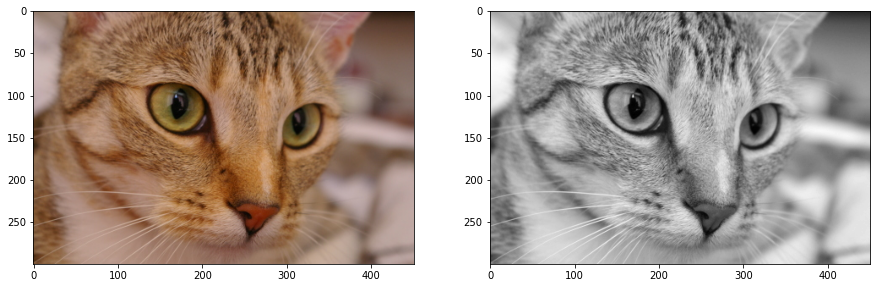

In [27]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img_gray, 'gray')

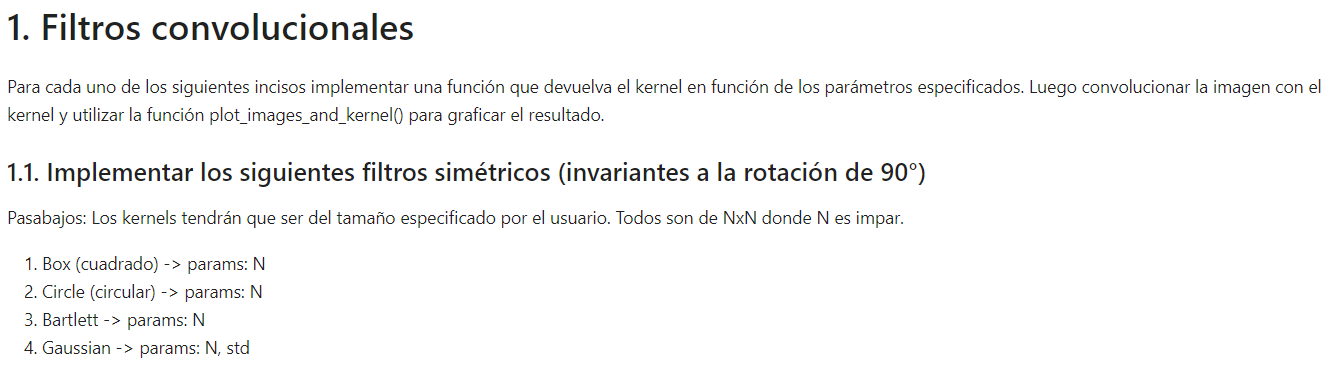

In [28]:
N=int(input("Ingrese la dimensión (N) : ")) 
while (N % 2 == 0):
  print("Pruebe con un número impar")
  N=int(input("Ingrese la dimensión (N) : "))


Ingrese la dimensión (N) : 9


#1. BOX

In [29]:
def Kernel_Box(N):
  dimensions=(N,N)
  kernel=np.ones(dimensions, np.float32)/(N*N)
  return kernel

kernel_box=Kernel_Box(N)
print(kernel_box)

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


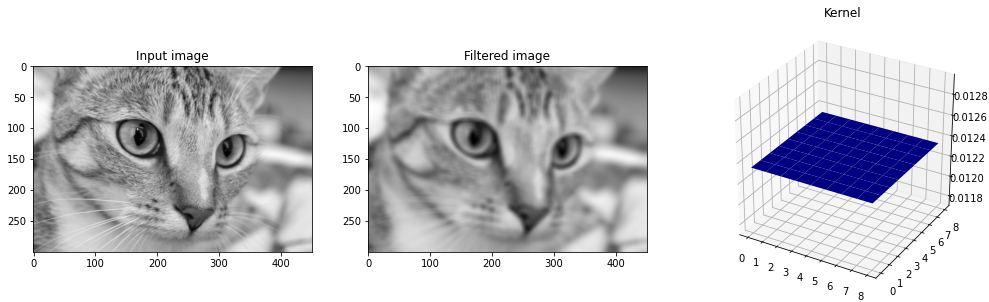

In [30]:
#Establecer cval=1,0 equivale a rellenar el borde exterior de la entrada con 1,0 (y luego extraer sólo la región original del resultado).
#img_res=ndimage.convolve(img_gray, box, mode='constant', cval=1.0)

img_res_box=convolve2d(img_gray, kernel_box, boundary='symm', mode='same')

plot_images_and_kernel(img_gray,img_res_box,kernel_box)

#2. CIRCLE

In [31]:
def Kernel_Circle(N):
  radius=int(N/2)  #Si quieres que el kernel sea de 3*3-->radio=N/2.
  kernel=np.zeros((2*radius+1, 2*radius+1))
  y, x=np.ogrid[-radius:radius+1, -radius:radius+1]
  mask=x**2 + y**2 <= radius**2 #Mascara auxiliar para poder ubicar los 1
  kernel[mask]=1/(N*N)
  return kernel

kernel_circle=Kernel_Circle(N)
print(kernel_circle)


[[0.         0.         0.         0.         0.01234568 0.
  0.         0.         0.        ]
 [0.         0.         0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.         0.        ]
 [0.         0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.        ]
 [0.         0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.        ]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.         0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.        ]
 [0.         0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.        ]
 [0.         0.         0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.         0.        ]
 [0.         0.         0.         0.         0.01234568 0.
  0.         0.         0.        ]]


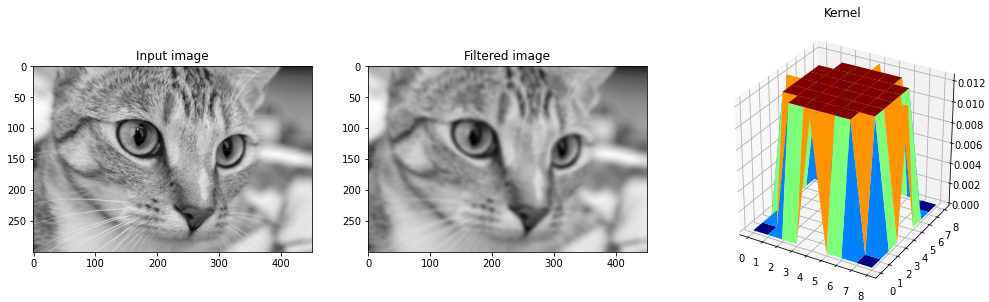

In [32]:
img_res_circle=convolve2d(img_gray, kernel_circle, boundary='symm', mode='same')

# fig, axes = plt.subplots(1, 2, figsize=(15,5))
# axes[0].imshow(img_gray,"gray")
# axes[0].set_title("Imagen original")
# #axes[1].imshow(img_res,"gray")
# #axes[1].set_title("Imagen resultante (convolve ndimage)")
# axes[1].imshow(img_res_circle,"gray")
# axes[1].set_title("Imagen resultante (convolve2d)")

plot_images_and_kernel(img_gray,img_res_circle,kernel_circle)

#3. BARTLETT

In [51]:
def Kernel_Bartlett(N):
  # Primero calculo el orden para armar la secuencia
  orden=int((N+1)*(1/2))
  # Ahora uso 2 vectores para luego combinarlos y armar la secuencia Bartlett
  vector1=np.arange(1,orden)    #Ascendente
  vector2=np.arange(orden,0,-1) #Descendente
  
  kernel=np.expand_dims(np.append(vector1,vector2),1)

  # Ahora calculo producto exterior
  kernel_2D=np.outer(kernel.T,kernel.T)
  kernel_2D=kernel_2D/(kernel_2D.sum())
  return kernel_2D

kernel_bartlett=Kernel_Bartlett(N)
print(kernel_bartlett)

[[0.0016 0.0032 0.0048 0.0064 0.008  0.0064 0.0048 0.0032 0.0016]
 [0.0032 0.0064 0.0096 0.0128 0.016  0.0128 0.0096 0.0064 0.0032]
 [0.0048 0.0096 0.0144 0.0192 0.024  0.0192 0.0144 0.0096 0.0048]
 [0.0064 0.0128 0.0192 0.0256 0.032  0.0256 0.0192 0.0128 0.0064]
 [0.008  0.016  0.024  0.032  0.04   0.032  0.024  0.016  0.008 ]
 [0.0064 0.0128 0.0192 0.0256 0.032  0.0256 0.0192 0.0128 0.0064]
 [0.0048 0.0096 0.0144 0.0192 0.024  0.0192 0.0144 0.0096 0.0048]
 [0.0032 0.0064 0.0096 0.0128 0.016  0.0128 0.0096 0.0064 0.0032]
 [0.0016 0.0032 0.0048 0.0064 0.008  0.0064 0.0048 0.0032 0.0016]]


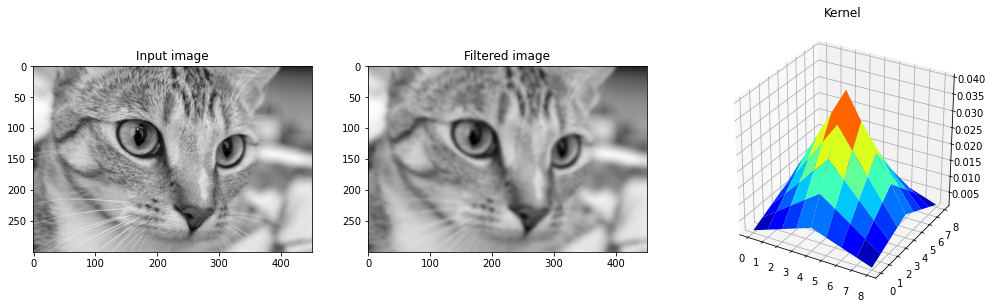

In [52]:
img_res_bartlett=convolve2d(img_gray, kernel_bartlett, boundary='symm', mode='same')

plot_images_and_kernel(img_gray,img_res_bartlett,kernel_bartlett)

#4. GAUSSIAN 

In [35]:
#Es una función auxiliar para calcular la densidad utilizando la fórmula de la distribución normal univariante
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

In [36]:
def Kernel_Gaussian(size=N, sigma=1):
  #Creo el kernel unidimensional con el size dado por el usuario
  kernel_1D=np.linspace(-(size//2), size//2, size)
  for i in range(size):
    #Aplico la función aux
    kernel_1D[i]=dnorm(kernel_1D[i], 0, sigma)

  #Paso el kernel de una dimension a uno de dos haciendo el producto exterior
  kernel_2D=np.outer(kernel_1D.T, kernel_1D.T)
 
  kernel_2D*=(1.0/kernel_2D.max())
  return kernel_2D

std=10
kernel_gaussian=Kernel_Gaussian(N,std)
print(kernel_gaussian)

[[0.85214379 0.8824969  0.90483742 0.91851228 0.92311635 0.91851228
  0.90483742 0.8824969  0.85214379]
 [0.8824969  0.91393119 0.93706746 0.95122942 0.95599748 0.95122942
  0.93706746 0.91393119 0.8824969 ]
 [0.90483742 0.93706746 0.96078944 0.97530991 0.98019867 0.97530991
  0.96078944 0.93706746 0.90483742]
 [0.91851228 0.95122942 0.97530991 0.99004983 0.99501248 0.99004983
  0.97530991 0.95122942 0.91851228]
 [0.92311635 0.95599748 0.98019867 0.99501248 1.         0.99501248
  0.98019867 0.95599748 0.92311635]
 [0.91851228 0.95122942 0.97530991 0.99004983 0.99501248 0.99004983
  0.97530991 0.95122942 0.91851228]
 [0.90483742 0.93706746 0.96078944 0.97530991 0.98019867 0.97530991
  0.96078944 0.93706746 0.90483742]
 [0.8824969  0.91393119 0.93706746 0.95122942 0.95599748 0.95122942
  0.93706746 0.91393119 0.8824969 ]
 [0.85214379 0.8824969  0.90483742 0.91851228 0.92311635 0.91851228
  0.90483742 0.8824969  0.85214379]]


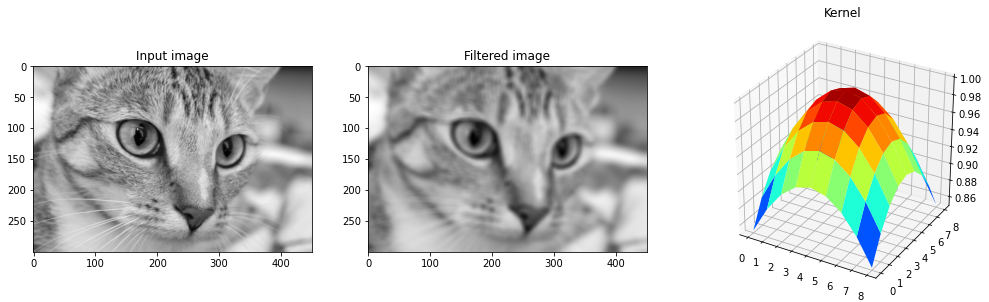

In [37]:
img_res_gaussian=convolve2d(img_gray, kernel_gaussian, boundary='symm', mode='same')

plot_images_and_kernel(img_gray,img_res_gaussian,kernel_gaussian)

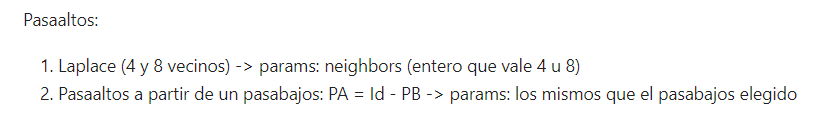

#1. LAPLACE(4 y 8 vecinos)

In [38]:
def Kernel_Laplace(n):  #n=neighbors
  if n==4:
    kernel_Laplacian=np.array([
                              [0,-1,0], 
                              [-1,4,-1], 
                              [0,-1,0]
                              ])
    return kernel_Laplacian
  else: 
    if n==8:
      kernel_Laplacian = np.array([
                                  [-1, -1, -1], 
                                  [-1,  8, -1], 
                                  [-1, -1, -1]
                                  ])
      return kernel_Laplacian
    else:
        print("Ingrese n=4 o n=8")
n=8
kernel_laplace=Kernel_Laplace(n)

print(kernel_laplace)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


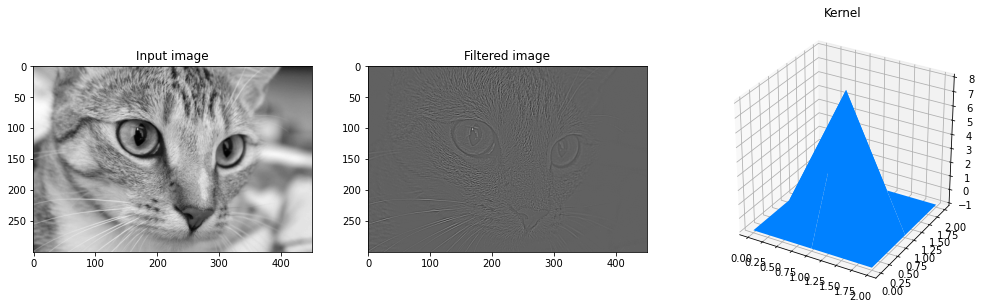

In [39]:
img_res_laplace=convolve2d(img_gray, kernel_laplace, boundary='symm', mode='same')

plot_images_and_kernel(img_gray,img_res_laplace,kernel_laplace)

#2. Pasaaltos--> PA=Id-PB

In [40]:
def Kernel_PasaAltos(PB):
  dimension=PB.shape[0]
  Id=np.eye(dimension)
  PA=Id-PB
  return PA

#Para este caso elegí el filtro Box
PB=Kernel_Box(N)
kernel_pasaaltos=Kernel_PasaAltos(PB)
print(kernel_pasaaltos)


[[ 0.98765432 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568  0.98765432 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568  0.98765432 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568  0.98765432 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568  0.98765432 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568  0.98765432
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
   0.98765432 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568  0.98765432 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234

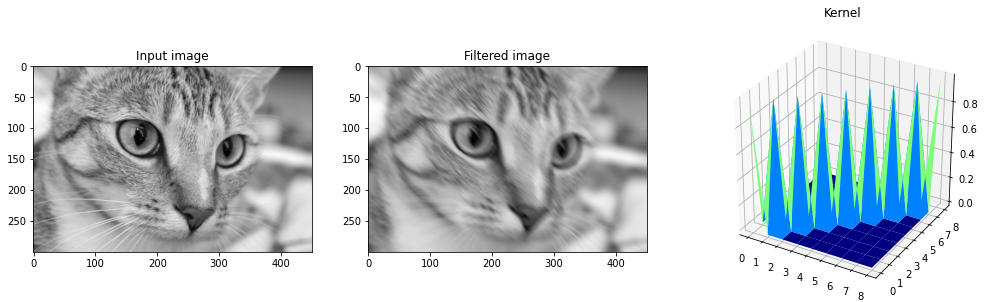

In [41]:
img_res_pasaaltos=convolve2d(img_gray, kernel_pasaaltos, boundary='symm', mode='same')

plot_images_and_kernel(img_gray,img_res_pasaaltos,kernel_pasaaltos)

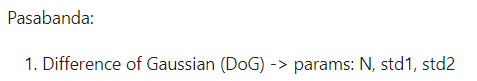

In [43]:
def Difference_Of_Gaussian(N,std1,std2):

  if std1<std2:
    low_sigma = Kernel_Gaussian(N,std1)
    high_sigma = Kernel_Gaussian(N,std2)
    
  else:
    low_sigma = Kernel_Gaussian(N,std2)
    high_sigma = Kernel_Gaussian(N,std1)

  # Calculate the DoG by subtracting
  dog = low_sigma - high_sigma
  return dog

kernel_dog=Difference_Of_Gaussian(9,1.2,10)
print(kernel_dog)

[[-0.85212884 -0.88232705 -0.90387344 -0.91578044 -0.91925043 -0.91578044
  -0.90387344 -0.88232705 -0.85212884]
 [-0.88232705 -0.91200073 -0.92611169 -0.92018147 -0.91206055 -0.92018147
  -0.92611169 -0.91200073 -0.88232705]
 [-0.90387344 -0.92611169 -0.89861292 -0.7991056  -0.73084646 -0.7991056
  -0.89861292 -0.92611169 -0.90387344]
 [-0.91578044 -0.92018147 -0.7991056  -0.49069805 -0.2883642  -0.49069805
  -0.7991056  -0.92018147 -0.91578044]
 [-0.91925043 -0.91206055 -0.73084646 -0.2883642   0.         -0.2883642
  -0.73084646 -0.91206055 -0.91925043]
 [-0.91578044 -0.92018147 -0.7991056  -0.49069805 -0.2883642  -0.49069805
  -0.7991056  -0.92018147 -0.91578044]
 [-0.90387344 -0.92611169 -0.89861292 -0.7991056  -0.73084646 -0.7991056
  -0.89861292 -0.92611169 -0.90387344]
 [-0.88232705 -0.91200073 -0.92611169 -0.92018147 -0.91206055 -0.92018147
  -0.92611169 -0.91200073 -0.88232705]
 [-0.85212884 -0.88232705 -0.90387344 -0.91578044 -0.91925043 -0.91578044
  -0.90387344 -0.88232705

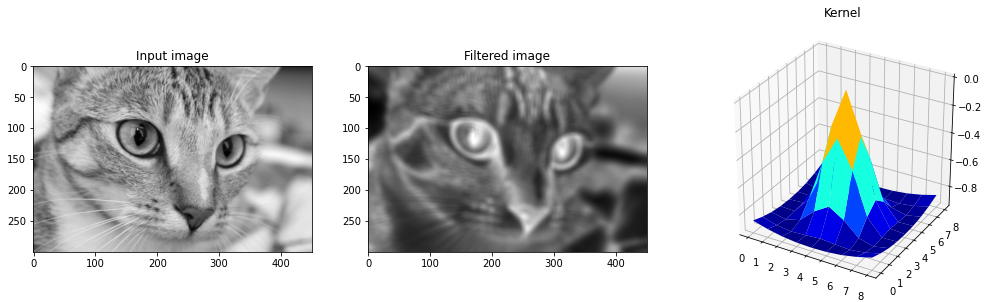

In [44]:
img_res_DoG=convolve2d(img_gray, kernel_dog, boundary='symm', mode='same')

plot_images_and_kernel(img_gray,img_res_DoG,kernel_dog)

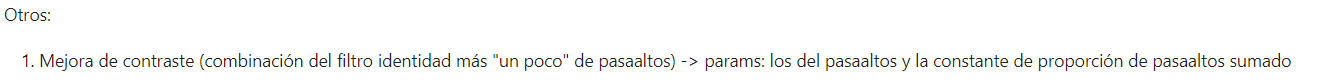

In [45]:
def Mejora_Contraste(neighbors,extra):
  pasa_altos=Kernel_Laplace(4)
  Id=np.zeros_like(pasa_altos)
  mitad=int((Id.shape[0]-1)/2)
  Id[mitad,mitad]=1
  aux=pasa_altos*extra+Id
  return aux

kernel_mejora_contraste=Mejora_Contraste(8,0.2)

print(kernel_mejora_contraste)

[[ 0.  -0.2  0. ]
 [-0.2  1.8 -0.2]
 [ 0.  -0.2  0. ]]


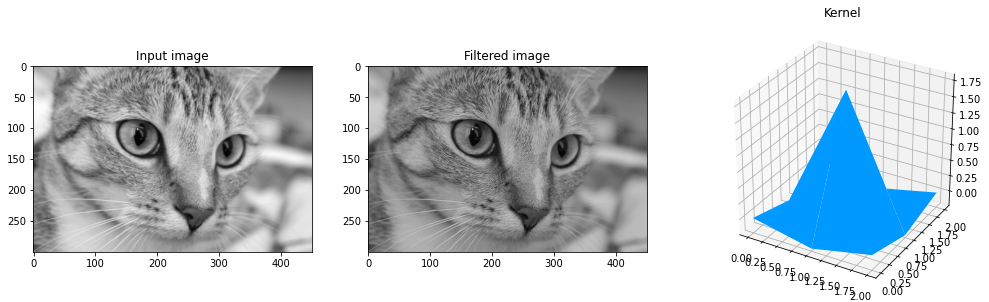

In [46]:
img_res_mejora=convolve2d(img_gray, kernel_mejora_contraste, boundary='symm', mode='same')

plot_images_and_kernel(img_gray,img_res_mejora,kernel_mejora_contraste)

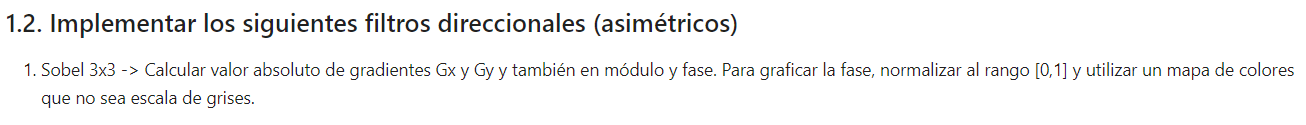

In [47]:
def Sobel(image):
  #En el caso de cambiar el orden de la matriz cambian los kernel
  kernel_Gx=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],dtype = np.float)
  kernel_Gy=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)

  #Obtengo los gradientes Gx y Gy
  Gx=convolve2d(image, kernel_Gx, mode='same', boundary = 'symm', fillvalue=0)
  Gy=convolve2d(image, kernel_Gy, mode='same', boundary = 'symm', fillvalue=0)

  #Calculo modulo y fase!
  modulo=np.sqrt(Gx*Gx+Gy*Gy)
  fase=(np.arctan2(Gy,Gx)+ np.pi)/(2*np.pi)

  return modulo,fase 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Fase')

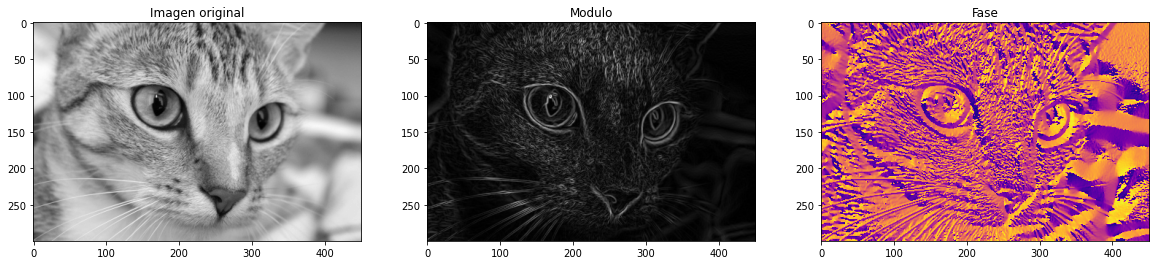

In [48]:
#Aplico la función
modulo,fase=Sobel(img_gray)

#Visualización
fig, axes = plt.subplots(1, 3, figsize=(20,10))
axes[0].imshow(img_gray,"gray")
axes[0].set_title("Imagen original")
axes[1].imshow(modulo,"gray")
axes[1].set_title("Modulo")
axes[2].imshow(fase,"plasma")
axes[2].set_title("Fase")

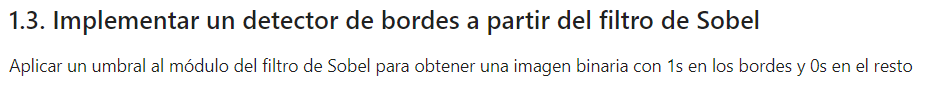

In [49]:
def Detector_De_Bordes(img):
  if(len(img.shape)<3):
      #print('gray')
      #Uso Sobel para sacar el modulo y fase de la img
      mod_img,fase_img=Sobel(img)
      umbral=1/2
      #Si el modulo de la imagen no supera el umbral le pongo 0
      mod_img[mod_img<umbral]=0
      #Si el modulo de la imagen supera el umbral lo llevo a 1.
      mod_img[mod_img>=umbral]=1

      return mod_img
  else: 
      #print('Color(RGB)')
      print("Ingrese una imagen en escala de grises")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Fase')

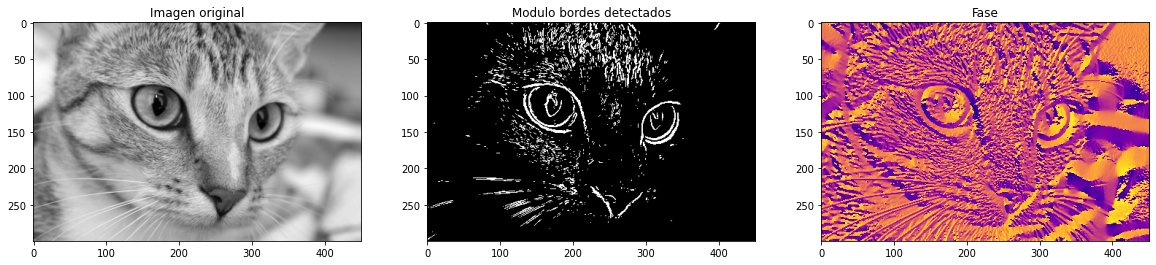

In [50]:
#Aplico la función
modulo_dectector=Detector_De_Bordes(img_gray)

#Visualización
fig, axes = plt.subplots(1, 3, figsize=(20,10))
axes[0].imshow(img_gray,"gray")
axes[0].set_title("Imagen original")
axes[1].imshow(modulo_dectector,"gray")
axes[1].set_title("Modulo bordes detectados")
axes[2].imshow(fase,"plasma")
axes[2].set_title("Fase")

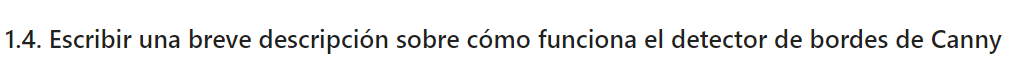

El detector de bordes Canny se compone de 5 pasos:


1.   Noise reduction.
     
     Primero aplicamos el filtro gaussiano para eliminar el ruido de la imagen, logrando así suavizar el ruido.
2.   Gradient calculation.

     En este paso se detecta la intensidad y la dirección de los bordes calculando el gradiente de la imagen mediante los operadores de detección de bordes. Para detectarlos se aplican filtros que resalten el cambio de intensidad en la dirección horizontal y la dirección vertical.

     Para detectar los cambios se aplica entonces el ya conocido filtro Sobel a la imagen. Hay que tener en cuenta que el resultado del filtro Sobel se obtienen filtros gruesos y otros finos, los gruesos serán mitigados en el siguiente paso(3). A su vez, la intensidad del gradiente no tiene un nivel de intensidad uniforme, ya que varía entre 0 y 255.

3.   Non-maximum suppression.

     Como se dijo en el paso anterior el objetivo será que la imagen solo tenga bordes finos, adelgazando los bordes gruesos. Para lograrlo se recorre todos los puntos de la matriz intensidad del gradiente y se encuentran los pixeles con el valor máximo en las direcciones de los bordes.

4.   Double threshold.

     Este paso tiene como objetivo identificar 3 tipos de píxeles: fuertes, débiles y no relevantes. El umbral alto se utiliza para identificar los píxeles fuertes, mientras que el umbral bajo se utiliza para identificar los píxeles no relevantes.
Todos los píxeles que tienen una intensidad entre ambos umbrales se marcan como débiles y el mecanismo de histéresis (siguiente paso) nos ayudará a identificar los que podrían considerarse fuertes y los que se consideran no relevantes.

   

5.   Edge Tracking by Hysteresis.

     A partir de los resultados del umbral, la histéresis consiste en transformar los píxeles débiles en fuertes, si y sólo si al menos uno de los píxeles que rodean al que se procesa es fuerte, como se describe a continuación:

     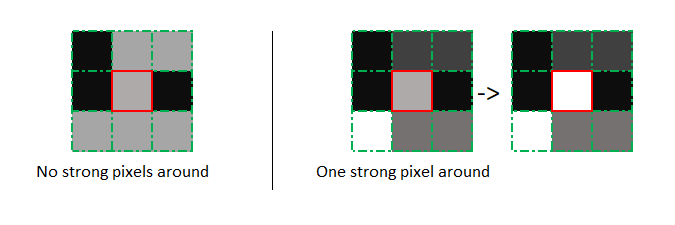


